In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [2]:
fullPath=r'C:\Users\unmes\Documents\Projects\air_quality\data\realAWSCloudwatch\ec2_cpu_utilization_825cc2.csv'
data = pd.read_csv(fullPath)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\unmes\\Documents\\Projects\\air_quality\\data\\realAWSCloudwatch\\ec2_cpu_utilization_825cc2.csv'

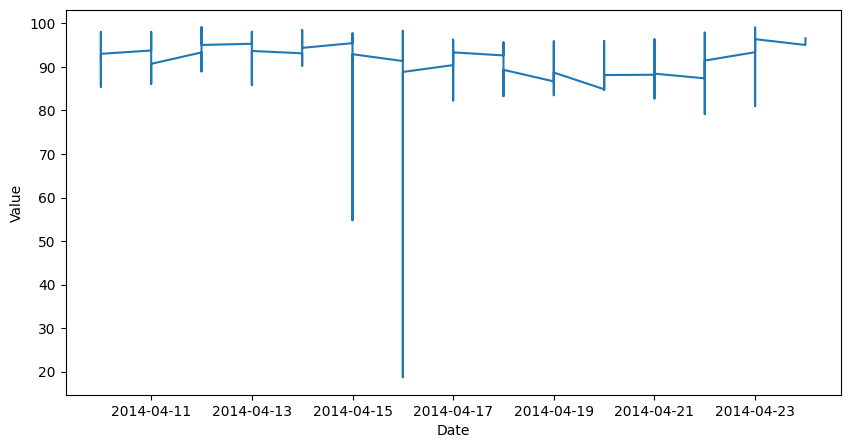

In [ ]:
x = [dt.datetime.strptime(d,"%Y-%m-%d %H:%M:%S").date() for d in data["timestamp"]]
y = data["value"]

plt.figure(figsize=(10, 5))
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

C:\Users\unmes\AppData\Local\Temp\ipykernel_10684\2871582786.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(fullPath, header=0, parse_dates=[0], index_col=0, date_parser=parser)
c:\Users\unmes\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\unmes\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\unmes\AppData\Local\Programs\Python\Python312\Lib\site-packages\stat

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                 4032
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -9940.522
Date:                Tue, 30 Jul 2024   AIC                          19887.045
Time:                        22:52:44   BIC                          19905.950
Sample:                             0   HQIC                         19893.743
                               - 4032                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3205      0.003    -96.542      0.000      -0.327      -0.314
ar.L2         -0.1494      0.005    -27.637      0.000      -0.160      -0.139
sigma2         8.1191      0.030    269.286      0.0

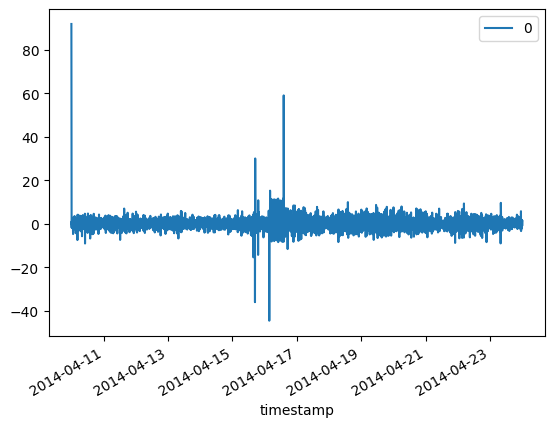

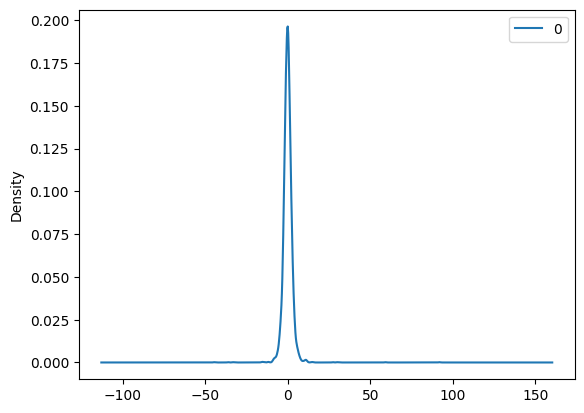

                 0
count  4032.000000
mean      0.024334
std       3.196217
min     -44.597831
25%      -1.381496
50%      -0.032909
75%       1.297268
max      91.958000


In [ ]:
# Define the parser function
def parser(x):
    return dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

fullPath=r'C:\Users\unmes\Documents\Projects\air_quality\data\realAWSCloudwatch\ec2_cpu_utilization_825cc2.csv'
data = pd.read_csv(fullPath, header=0, parse_dates=[0], index_col=0, date_parser=parser)

# Ensure data is a series
if isinstance(data, pd.DataFrame) and data.shape[1] == 1:
    data = data.squeeze("columns")

# Fit the ARIMA model
arimaM = ARIMA(data, order=(2, 1, 0))
arimaMfit = arimaM.fit()

# Print the model summary
print(arimaMfit.summary())

# Plot residual errors
errors = pd.DataFrame(arimaMfit.resid)
errors.plot()
plt.show()

errors.plot(kind='kde')
plt.show()

# Print residual errors summary
print(errors.describe())

C:\Users\unmes\AppData\Local\Temp\ipykernel_10684\1651378497.py:13: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(fullPath, header=0, parse_dates=[0], index_col=0, date_parser=parser)


pred=88.111371, exp=90.542000
pred=89.626720, exp=88.666000
pred=88.971441, exp=89.376000
pred=89.402945, exp=93.916000
pred=92.492135, exp=91.428000
pred=91.587766, exp=86.666000
pred=88.380798, exp=86.916000
pred=87.445150, exp=87.334000
pred=87.179661, exp=90.768000
pred=89.707260, exp=86.376000
pred=87.232218, exp=87.542000
pred=87.755237, exp=87.250000
pred=87.188322, exp=87.584000
pred=87.522743, exp=87.084000
pred=87.188751, exp=87.576000
pred=87.494596, exp=90.458000
pred=89.548517, exp=93.838000
pred=92.481977, exp=89.458000
pred=90.317011, exp=89.834000
pred=90.278968, exp=87.750000
pred=88.314781, exp=86.334000
pred=87.013212, exp=88.334000
pred=87.925619, exp=85.984000
pred=86.421738, exp=88.180000
pred=87.831279, exp=87.556000
pred=87.462049, exp=87.722000
pred=87.752009, exp=88.750000
pred=88.426770, exp=92.916000
pred=91.562072, exp=93.126000
pred=92.538896, exp=87.666000
pred=89.243577, exp=89.542000
pred=89.683781, exp=87.584000
pred=87.922103, exp=87.542000
pred=87.80

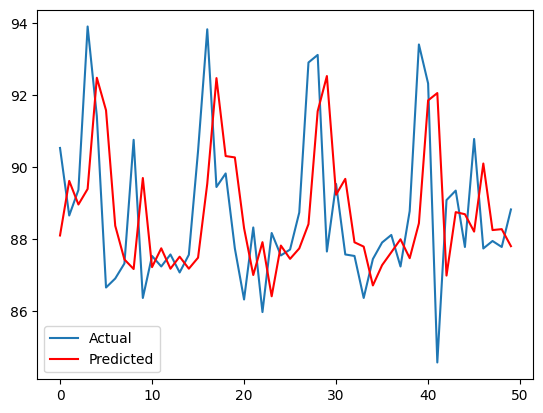

In [ ]:
import pandas as pd
import datetime as dt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

# Define the parser function
def parser(x):
    return dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

# Load the data
fullPath=r'C:\Users\unmes\Documents\Projects\air_quality\data\realAWSCloudwatch\ec2_cpu_utilization_825cc2.csv'
data = pd.read_csv(fullPath, header=0, parse_dates=[0], index_col=0, date_parser=parser)

# Ensure data is a series if it has only one column
if data.shape[1] == 1:
    data = data.iloc[:, 0]

X = data.values
size = int(len(X) * 0.66)
limitCount = 50
train, test = X[0:size], X[size:size+limitCount]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('pred=%f, exp=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Mean Squared Error: %.3f' % error)

# Plot the results
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.show()
